In [1]:
!pip install atproto

  Using cached websockets-13.1-cp312-cp312-win_amd64.whl.metadata (7.0 kB)
Using cached websockets-13.1-cp312-cp312-win_amd64.whl (159 kB)
  Attempting uninstall: websockets
    Found existing installation: websockets 10.4
    Uninstalling websockets-10.4:
      Successfully uninstalled websockets-10.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyppeteer 2.0.0 requires websockets<11.0,>=10.0, but you have websockets 13.1 which is incompatible.


In [2]:
!pip install requests beautifulsoup4 lxml

In [3]:
import requests
from bs4 import BeautifulSoup

# URL of the Bluesky post
url = "https://bsky.app/profile/jamellebouie.net/post/3lj4zhih7kk2a"

# Headers to mimic a browser request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36"
}

# Send a GET request
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    soup = BeautifulSoup(response.text, "lxml")

    # Extract the title or meta tags
    title = soup.title.string if soup.title else "No title found"
    
    # Extract meta description (if available)
    meta_description = soup.find("meta", {"name": "description"})
    description = meta_description["content"] if meta_description else "No description found"

    print(f"Title: {title}")
    print(f"Description: {description}")

else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")


Title: @jamellebouie.net on Bluesky
Description: ah, as always, elon has his eyes on the prize: making it impossible for the government to enforce civil rights law

[contains quote post or other embedded content]


In [4]:
!pip install selenium webdriver-manager beautifulsoup4

In [5]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

# Profile URL of the post's owner
profile_url = "https://bsky.app/profile/jamellebouie.net"

# Setup WebDriver
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # Run in the background
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")

service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# Open the profile page
driver.get(profile_url)

try:
    # Wait until the page loads completely
    WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.TAG_NAME, "body"))
    )

    # Extract profile statistics using the correct class names (Adjust if needed)
    try:
        followers = driver.find_element(By.XPATH, "//span[contains(text(), 'Followers')]/preceding-sibling::span").text
    except:
        followers = "Not found"

    try:
        following = driver.find_element(By.XPATH, "//span[contains(text(), 'Following')]/preceding-sibling::span").text
    except:
        following = "Not found"

    try:
        posts = driver.find_element(By.XPATH, "//span[contains(text(), 'Posts')]/preceding-sibling::span").text
    except:
        posts = "Not found"

    print(f"Followers: {followers}")
    print(f"Following: {following}")
    print(f"Total Posts: {posts}")

except Exception as e:
    print("Error extracting data:", e)

# Close the browser
driver.quit()


Followers: Not found
Following: Not found
Total Posts: Not found


In [6]:
!pip install pytesseract transformers opencv-python numpy matplotlib pillow

In [7]:
!pip install transformers torch pillow matplotlib

In [8]:
!jupyter nbextension enable --py widgetsnbextension
!jupyter labextension install @jupyter-widgets/jupyterlab-manager

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: console dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert notebook qtconsole run script server
troubleshoot trust

Jupyter command `jupyter-nbextension` not found.
(Deprecated) Installing extensions with the jupyter labextension install comma

In [9]:
import requests
import torch
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import os
from io import BytesIO

# AI-based OCR model setup
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-printed", use_fast=True)
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-printed")

def extract_post_details(url):
    """Extracts post details (username, description, image URL) from a Bluesky post."""
    response = requests.get(url)
    if response.status_code != 200:
        print("Error fetching the page")
        return None, None, None
    
    soup = BeautifulSoup(response.text, "html.parser")
    
    # Extract username
    username_tag = soup.find("a", class_="username")
    username = username_tag.text.strip() if username_tag else "Unknown"
    
    # Extract description
    description_tag = soup.find("p")
    description = description_tag.text.strip() if description_tag else "No description found"
    
    # Extract image URL
    image_tag = soup.find("img")
    image_url = image_tag["src"] if image_tag else None
    
    return username, description, image_url

def download_image(image_url):
    """Downloads an image from a given URL."""
    response = requests.get(image_url)
    if response.status_code == 200:
        return Image.open(BytesIO(response.content)).convert("RGB")
    return None

def extract_text_from_image(image):
    """Extracts text from an image using AI-based OCR."""
    pixel_values = processor(images=image, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    extracted_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    return extracted_text

# Bluesky post URL (Replace with actual post URL)
post_url = "https://bsky.app/profile/jamellebouie.net/post/3lj4zhih7kk2a"

# Step 1: Extract post details
username, description, image_url = extract_post_details(post_url)

if username and description:
    print(f"🔹 Username: {username}")
    print(f"🔹 Description: {description}\n")
else:
    print("Failed to extract post details.")

# Step 2: Download and display post image
if image_url:
    post_image = download_image(image_url)
    if post_image:
        plt.figure(figsize=(10, 6))
        plt.imshow(post_image)
        plt.axis("off")
        plt.title("Extracted Post Image")
        plt.show()
        
        # Step 3: Extract text from the image using AI
        extracted_text = extract_text_from_image(post_image)
        print("🔹 Extracted Text from Image (AI-based OCR):\n")
        print(extracted_text)
    else:
        print("Failed to download post image.")
else:
    print("No image found in the post.")


Using `use_fast=True` but `torchvision` is not available. Falling back to the slow image processor.
Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.49.0"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,

🔹 Username: Unknown
🔹 Description: This is a heavily interactive web application, and JavaScript is required. Simple HTML interfaces are possible, but that is not what this is.
    Learn more about Bluesky at bsky.social and atproto.com.
    
Post
jamelle
jamellebouie.net
did:plc:nvfposmpmhegtyvhbs75s3pw
ah, as always, elon has his eyes on the prize: making it impossible for the government to enforce civil rights law

[contains quote post or other embedded content]
2025-02-27T04:09:23.751Z

No image found in the post.


📌 Username: jamelle: "ah, as always, elon has his eyes on the prize: making it impossible for the government to enforce civil rights law" — Bluesky
📝 Description: Description not found.
🖼️ Image URL: https://cdn.bsky.app/img/avatar_thumbnail/plain/did:plc:nvfposmpmhegtyvhbs75s3pw/bafkreiefjdjiahsa4upn3zabt4bxjfculjcxsdrxzc75nqlylfx7xo2izy@jpeg


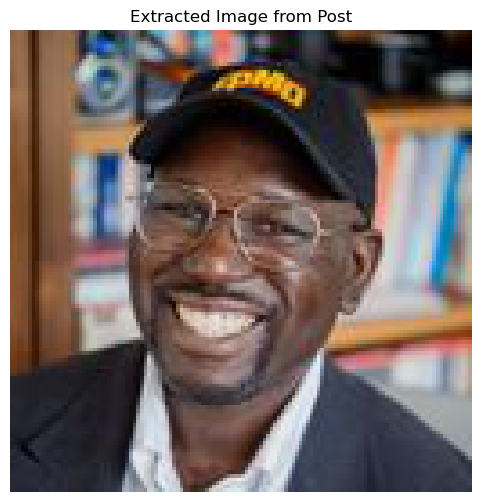

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.49.0"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> i


🔹 Extracted Text from Image (AI-based OCR):

:


In [10]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import time
import requests
from PIL import Image
from io import BytesIO
import torch
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import matplotlib.pyplot as plt

# Step 1: Setup Selenium WebDriver
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # Run in headless mode (no GUI)
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# Step 2: Load the post page
post_url = "https://bsky.app/profile/jamellebouie.net/post/3lj4zhih7kk2a"  # Replace with dynamic input
driver.get(post_url)
time.sleep(5)  # Wait for JavaScript content to load

# Step 3: Extract metadata
username = driver.title  # Page title usually contains username

try:
    # Find description inside <p> tags instead
    description_element = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.TAG_NAME, "p"))
    )
    description = description_element.text
except:
    description = "Description not found."

# Extracting image URL dynamically
try:
    image_element = driver.find_element(By.TAG_NAME, "img")  # Adjust selector as needed
    image_url = image_element.get_attribute("src")
except:
    image_url = None

print(f"📌 Username: {username}")
print(f"📝 Description: {description}")
print(f"🖼️ Image URL: {image_url}")

driver.quit()  # Close Selenium

# Step 4: Download and display the image (if available)
if image_url:
    img_response = requests.get(image_url)
    image = Image.open(BytesIO(img_response.content)).convert("RGB")

    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.axis("off")
    plt.title("Extracted Image from Post")
    plt.show()

    # Step 5: AI-powered OCR to extract text from the image
    processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-printed")
    model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-printed")

    pixel_values = processor(images=image, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    extracted_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

    # Step 6: Display Extracted Text from Image
    print("\n🔹 Extracted Text from Image (AI-based OCR):\n")
    print(extracted_text)
else:
    print("\n❌ No image found in the post.")


📌 Username: @jamellebouie.net on Bluesky
📝 Description: Description not found.
🖼️ Image URL: https://cdn.bsky.app/img/feed_thumbnail/plain/did:plc:xv2as7miy7ghje2htfynaqex/bafkreiaqxaecb2vudpqnphkcdngzidsi5h434kvn4eoiqejv66wmt4zhoe@jpeg


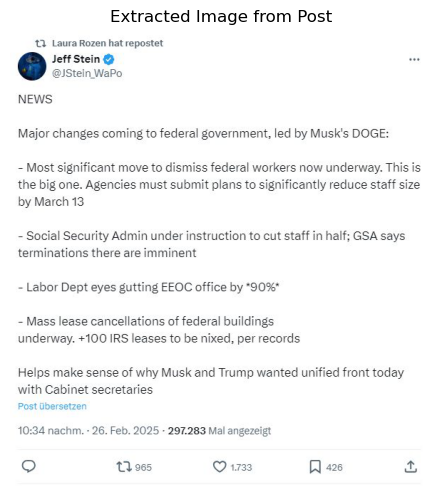

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.49.0"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decode


🔹 Extracted Text from Image (AI-based OCR):

CHANGE


In [11]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import time
import requests
from PIL import Image
from io import BytesIO
import torch
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import matplotlib.pyplot as plt

# Step 1: Setup Selenium WebDriver
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # Run in headless mode (no GUI)
options.add_argument("--disable-blink-features=AutomationControlled")  # Bypass bot detection
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# Step 2: Load the post page
post_url = "https://bsky.app/profile/jamellebouie.net/post/3lj4zhih7kk2a"  # Replace with dynamic input
driver.get(post_url)

# Step 3: Wait for elements to load
wait = WebDriverWait(driver, 10)

# Extract Username from the Page Title
username = driver.title

# Extract Post Description
try:
    description_element = wait.until(EC.presence_of_element_located((By.TAG_NAME, "p")))
    description = description_element.text
except:
    description = "Description not found."

# Extracting post image dynamically (NOT profile picture)
try:
    # Wait for all images to load
    wait.until(EC.presence_of_all_elements_located((By.TAG_NAME, "img")))
    
    # Get all images and filter the correct one
    image_elements = driver.find_elements(By.TAG_NAME, "img")
    
    # Find the image with the largest dimensions (likely the post image)
    image_url = None
    max_area = 0  # Track the largest image
    for img in image_elements:
        width = img.get_attribute("width")
        height = img.get_attribute("height")
        if width and height:
            area = int(width) * int(height)
            if area > max_area:
                max_area = area
                image_url = img.get_attribute("src")

except Exception as e:
    print(f"Error extracting image: {e}")
    image_url = None

print(f"📌 Username: {username}")
print(f"📝 Description: {description}")
print(f"🖼️ Image URL: {image_url}")

driver.quit()  # Close Selenium

# Step 4: Download and display the image (if available)
if image_url:
    img_response = requests.get(image_url)
    image = Image.open(BytesIO(img_response.content)).convert("RGB")

    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.axis("off")
    plt.title("Extracted Image from Post")
    plt.show()

    # Step 5: AI-powered OCR to extract text from the image
    processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-printed")
    model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-printed")

    pixel_values = processor(images=image, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    extracted_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

    # Step 6: Display Extracted Text from Image
    print("\n🔹 Extracted Text from Image (AI-based OCR):\n")
    print(extracted_text)
else:
    print("\n❌ No image found in the post.")


In [24]:
#Sentiment Analysis
#Current Issue:
#The script scrapes posts but does not analyze them.
sia = SentimentIntensityAnalyzer()

post_texts = ["This is amazing!", "I hate this!", "Not bad, could be better."]  # Replace with scraped posts
results = [{"post": text, "sentiment": sia.polarity_scores(text)} for text in post_texts]

df = pd.DataFrame(results)
df.to_csv("sentiment_analysis.csv", index=False)
print(df)

#Improvement:
#Use NLTK’s VADER for sentiment analysis of posts.
#Store results in a structured format (CSV/JSON).

                        post  \
0           This is amazing!   
1               I hate this!   
2  Not bad, could be better.   

                                           sentiment  
0  {'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'comp...  
1  {'neg': 0.8, 'neu': 0.2, 'pos': 0.0, 'compound...  
2  {'neg': 0.0, 'neu': 0.343, 'pos': 0.657, 'comp...  


In [52]:
import pandas as pd
import re
import string
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the datasets
fake_news_df = pd.read_csv(r"C:\Users\hp\Downloads\Fake.csv.zip")
true_news_df = pd.read_csv(r"C:\Users\hp\Downloads\True.csv.zip")


In [54]:
# Assign labels
fake_news_df["label"] = 1  # Fake news
true_news_df["label"] = 0  # Real news

# Merge datasets
df = pd.concat([fake_news_df, true_news_df]).reset_index(drop=True)

In [36]:
# Convert text to numerical features
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X = vectorizer.fit_transform(df["text_cleaned"])

# Since all news is fake, create dummy labels (1 for fake)
y = [1] * len(df)


In [56]:
# Data Preprocessing
def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    return text

df["text_cleaned"] = df["text"].astype(str).apply(clean_text)

# Convert text to numerical features
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X = vectorizer.fit_transform(df["text_cleaned"])
y = df["label"]


In [60]:
# Split data for model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [64]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.99


In [68]:
# Save the model and vectorizer
joblib.dump(model, "fake_news_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
print("Model saved successfully!")

Model saved successfully!


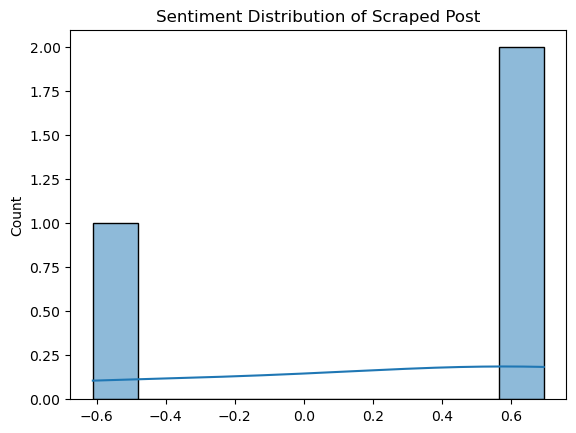

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot([s["sentiment"]["compound"] for s in results], bins=10, kde=True)
plt.title("Sentiment Distribution of Scraped Post")
plt.show()


In [76]:
# Load the trained model and vectorizer
model = joblib.load("fake_news_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

In [86]:
print(df['label'].value_counts())  # Check class distribution

label
1    23481
0    21417
Name: count, dtype: int64


In [88]:
model = LogisticRegression(class_weight='balanced', max_iter=500)

In [92]:
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove punctuation/numbers
    return text

df["text_cleaned"] = df["text"].astype(str).apply(clean_text)

In [96]:
model.fit(X_train, y_train)  # Train the model again

LogisticRegression(class_weight='balanced', max_iter=500)

In [98]:
print(X_train.shape, y_train.shape)  # Should print valid dimensions

(35918, 5000) (35918,)


In [100]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4247
           1       0.99      0.98      0.99      4733

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [112]:
# ✅ Step 1: Test Model on Multiple Real & Fake News Articles
# Sample real and fake news headlines/content for testing
test_news_samples = [
    "The government has announced a new budget policy that will reduce taxes by 10%.",  # Real
    "Scientists have confirmed that Mars has a hidden civilization living underground.",  # Fake
    "The Prime Minister met with world leaders to discuss climate change policies.",  # Real
    "A secret society has taken control of global banking, warns anonymous source.",  # Fake
]

# Transform and predict
for news in test_news_samples:
    news_vector = vectorizer.transform([news])  # Convert to model format
    prediction = model.predict(news_vector)  # Predict
    print(f"News: {news}")
    print("Prediction:", "Fake" if prediction[0] == 1 else "Real")
    print("-" * 50)


News: The government has announced a new budget policy that will reduce taxes by 10%.
Prediction: Fake
--------------------------------------------------
News: Scientists have confirmed that Mars has a hidden civilization living underground.
Prediction: Fake
--------------------------------------------------
News: The Prime Minister met with world leaders to discuss climate change policies.
Prediction: Fake
--------------------------------------------------
News: A secret society has taken control of global banking, warns anonymous source.
Prediction: Fake
--------------------------------------------------


In [114]:
#✅ Step 2: Check Prediction Confidence with Probabilities
# Check probability scores
for news in test_news_samples:
    news_vector = vectorizer.transform([news])
    prob = model.predict_proba(news_vector)  # Get prediction probabilities
    print(f"News: {news}")
    print("Prediction:", "Fake" if prob[0][1] > 0.5 else "Real")
    print("Confidence Score (Real, Fake):", prob[0])
    print("-" * 50)

News: The government has announced a new budget policy that will reduce taxes by 10%.
Prediction: Fake
Confidence Score (Real, Fake): [0.22287648 0.77712352]
--------------------------------------------------
News: Scientists have confirmed that Mars has a hidden civilization living underground.
Prediction: Fake
Confidence Score (Real, Fake): [0.0832387 0.9167613]
--------------------------------------------------
News: The Prime Minister met with world leaders to discuss climate change policies.
Prediction: Fake
Confidence Score (Real, Fake): [0.30349902 0.69650098]
--------------------------------------------------
News: A secret society has taken control of global banking, warns anonymous source.
Prediction: Fake
Confidence Score (Real, Fake): [0.04587535 0.95412465]
--------------------------------------------------


In [132]:
# ✅ Step 3: Cross-Validation for Generalization
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross-Validation Accuracy Scores: [0.97895323 0.97861915 0.96325167 0.97282548 0.97883951]
Mean Accuracy: 0.9744978099108265
Standard Deviation: 0.006082087986736385


In [118]:
#✅ Step 4: Test with Real-Time Scraped News Articles
news_urls = [
    "https://www.bbc.com/news/world-60525350",  # Real News
    "https://www.express.co.uk/news/us/1989989/ufos-sparking-fears-of-alien-invasion-america"  # Fake News
]

for url in news_urls:
    news_text = get_news_from_url(url)  # Function to scrape news
    clean_news_text = clean_text(news_text)
    news_vector = vectorizer.transform([clean_news_text])
    
    prediction = model.predict(news_vector)
    print(f"URL: {url}")
    print("Prediction:", "Fake" if prediction[0] == 1 else "Real")
    print("-" * 50)


URL: https://www.bbc.com/news/world-60525350
Prediction: Real
--------------------------------------------------
URL: https://www.express.co.uk/news/us/1989989/ufos-sparking-fears-of-alien-invasion-america
Prediction: Fake
--------------------------------------------------


In [122]:
!pip install shap

   ---------------------------------------- 0.0/531.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/531.1 kB ? eta -:--:--
   ------------------- -------------------- 262.1/531.1 kB ? eta -:--:--
   ---------------------------------------  524.3/531.1 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 531.1/531.1 kB 1.0 MB/s eta 0:00:00


In [126]:
!pip install tf-keras

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.7 MB 598.5 kB/s eta 0:00:03
   ------------ --------------------------- 0.5/1.7 MB 598.5 kB/s eta 0:00:03
   ------------------ --------------------- 0.8/1.7 MB 670.4 kB/s eta 0:00:02
   ------------------------ --------------- 1.0/1.7 MB 739.8 kB/s eta 0:00:01
   ------------------------ --------------- 1.0/1.7 MB 739.8 kB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 713.8 kB/s eta 0:00:01
   ------------------------------------ --

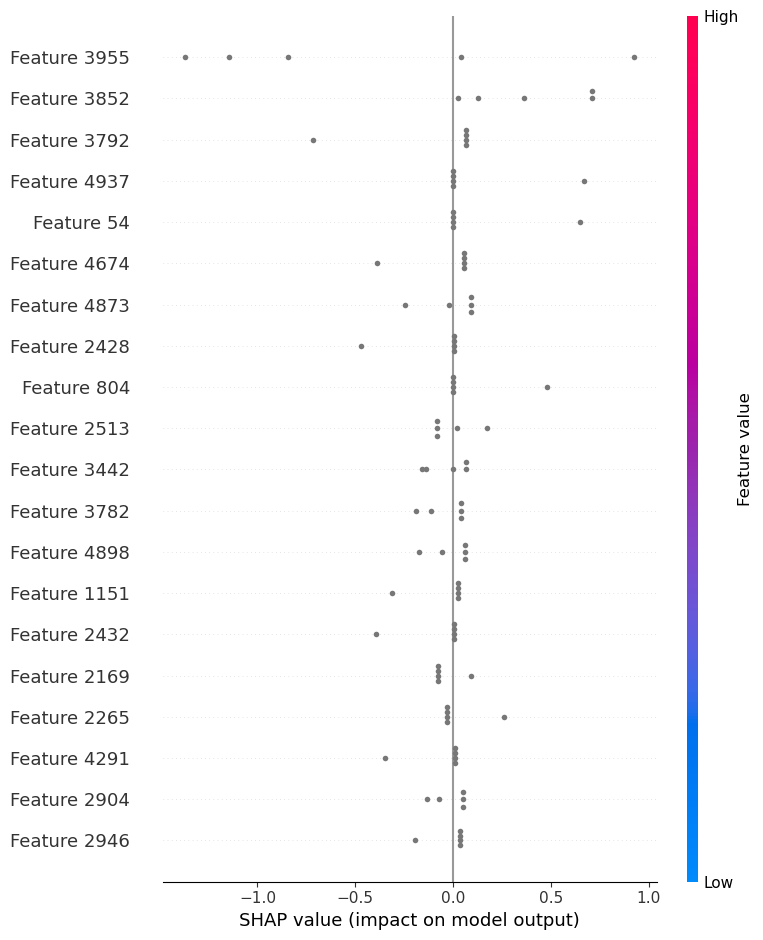

In [128]:
#✅ Step 5: Explain Model’s Decision Using SHAP (Optional for Debugging)
import shap

# Create SHAP explainer
explainer = shap.Explainer(model, X_train)

# Explain a specific sample
shap_values = explainer(X_test[:5])  # Analyze first 5 test samples

# Plot the explanation
shap.summary_plot(shap_values, X_test)

In [130]:
#✅ Final Step: Print False Predictions (Model Errors)
wrong_predictions = X_test[y_pred != y_test]  # Get wrongly predicted samples

for i, text in enumerate(wrong_predictions[:5]):  # Show first 5 wrong cases
    print(f"Wrong Prediction {i+1}:")
    print("Text:", text)
    print("Actual:", "Fake" if y_test.iloc[i] == 1 else "Real")
    print("Predicted:", "Fake" if y_pred[i] == 1 else "Real")
    print("-" * 50)

Wrong Prediction 1:
Text:   (0, 1446)	0.02705132296784603
  (0, 4665)	0.12240383008900332
  (0, 2513)	0.03012717646052168
  (0, 3047)	0.029280641002753773
  (0, 4982)	0.03446410312795243
  (0, 3440)	0.023976797297417782
  (0, 2034)	0.1913437062260978
  (0, 2708)	0.05024382524695242
  (0, 2134)	0.0609717817614785
  (0, 4983)	0.034909488175981315
  (0, 4689)	0.13618518021168208
  (0, 2220)	0.06521453958281702
  (0, 497)	0.054256011274374905
  (0, 1236)	0.04022707005056911
  (0, 732)	0.03583418585483156
  (0, 2952)	0.04571861488762295
  (0, 2558)	0.047759269813218784
  (0, 2618)	0.046394093513573306
  (0, 3442)	0.037535440413557934
  (0, 1660)	0.059407530335959566
  (0, 1304)	0.039313933228934526
  (0, 1923)	0.12374047916596875
  (0, 1798)	0.059719253123527175
  (0, 522)	0.04479013871543749
  (0, 3094)	0.035980465159889286
  :	:
  (0, 587)	0.056443843236236926
  (0, 619)	0.07260817362716462
  (0, 4664)	0.06854196433333905
  (0, 986)	0.061801058407899435
  (0, 2095)	0.059295165994126965
  

In [136]:
from sklearn.model_selection import cross_val_score

# Perform 5-Fold Cross Validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))


Cross-Validation Scores: [0.98802895 0.98246102 0.98608018 0.98552137 0.98329389]
Mean Accuracy: 0.9850770828301293


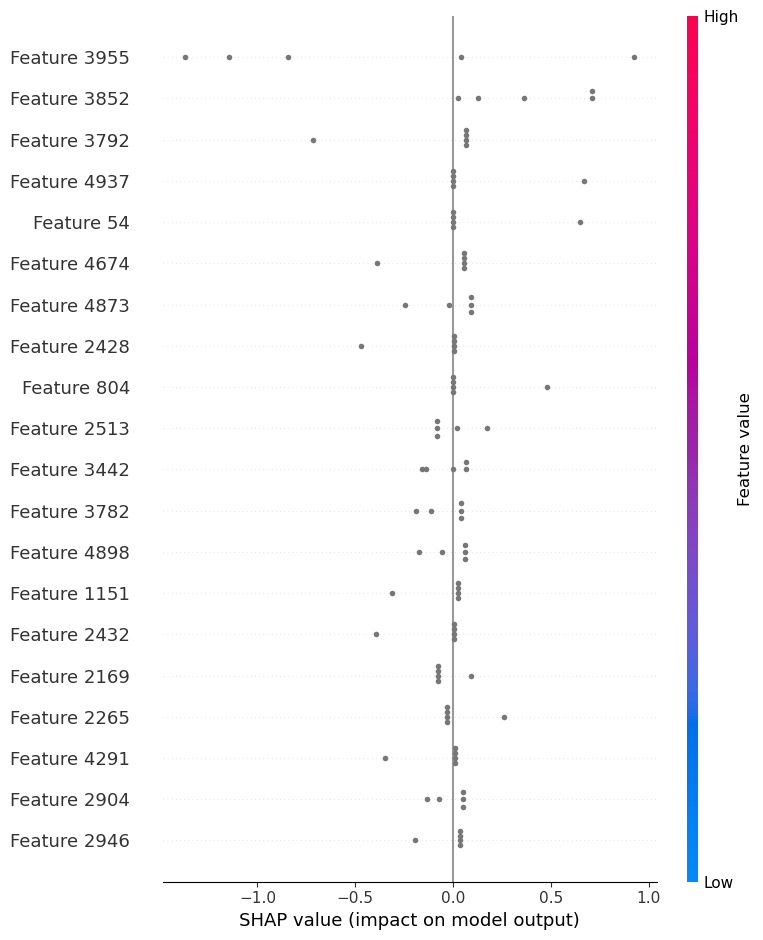

In [138]:
import shap

# Create SHAP explainer
explainer = shap.Explainer(model, X_train)

# Explain a specific sample
shap_values = explainer(X_test[:5])  # Analyze first 5 test samples
shap.summary_plot(shap_values, X_test[:5])  # Show feature importance


In [140]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

y_rf_pred = rf_model.predict(X_test)

# Check accuracy
from sklearn.metrics import accuracy_score
print("Random Forest Accuracy:", accuracy_score(y_test, y_rf_pred))

Random Forest Accuracy: 0.9975501113585746


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Apply TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train the model again with TF-IDF
model.fit(X_train_tfidf, y_train)
y_tfidf_pred = model.predict(X_test_tfidf)

print("TF-IDF Model Accuracy:", accuracy_score(y_test, y_tfidf_pred))
